<a href="https://colab.research.google.com/github/kimdesok/Statistical-Thinking-in-Python-Part-2/blob/main/Stats_by_Python8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hypothesis test examples
>* Define the null hypothesis.
>* Figure out how to simulate it.
>* Determine how to test it by defining the p value - what it means to be more extreme in order to compute the p value.

In [22]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

#Importing numpy
import numpy as np
import pandas as pd

#Load a csv file at the Google drive to the colab
file_path = r'/content/drive/MyDrive/datasets/mlb_nohitters.csv'
nohitter_game_no = np.loadtxt(fname=file_path, skiprows=1, usecols=range(0,2), delimiter=',')
nht_dead = []
nht_live = []
#print(nohitter_game_no)
for i in range(len(nohitter_game_no)-1):
  nohitter_times = nohitter_game_no[i+1,1] - nohitter_game_no[i,1]
  if(nohitter_game_no[i,0] < 19200000) :
    nht_dead.append(nohitter_times)
    #print(nohitter_game_no[i,0], nohitter_times)
  else:
    nht_live.append(nohitter_times)

#Load a csv file at the Google drive to the colab
file_path = r'/content/drive/MyDrive/datasets/female_literacy_fertility.csv'

df = pd.read_csv(file_path)

literacy = df['female literacy']

illiteracy = 100.0 - literacy

fertility = df['fertility']

#Load a csv file at the Google drive to the colab
file_path = r'/content/drive/MyDrive/datasets/bee_sperm.csv'

df = pd.read_csv(file_path, skiprows=3)

print(df.info())

control = df[df['Treatment']=='Control']['AliveSperm']
treated = df[df['Treatment']=='Pesticide']['AliveSperm']

   Specimen Treatment  ... Alive Sperm Millions  Dead Sperm Millions
0       227   Control  ...             2.079617             0.070383
1       228   Control  ...             2.204001             0.083499
2       229   Control  ...             0.086406             0.001094
3       230   Control  ...             1.749139             0.125861
4       231   Control  ...             1.552456             0.035044

[5 rows x 18 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Specimen                 235 non-null    int64  
 1   Treatment                235 non-null    object 
 2   Environment              235 non-null    object 
 3   TreatmentNCSS            235 non-null    int64  
 4   Sample ID                235 non-null    object 
 5   Colony                   235 non-null    int64  
 6   Cage                 

In [25]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [71]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [73]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [28]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)
    
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [2]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)
    # Return entry [0,1]
    return corr_mat[0,1]

#Games between no hitters
*> In 1920, a new rule is introduced for a pitcher not to cheat on the ball by rubbing saliva etc.
*> To see if the rule changed the number of games between no hitter games.

Text(0, 0.5, 'CDF')

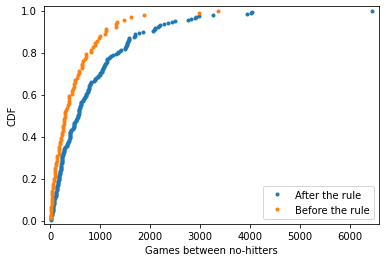

In [99]:
# Create an ECDF from real data: x, y
x, y = ecdf(nht_dead)

# Create a CDF from theoretical samples: x_theor, y_theor
x_, y_ = ecdf(nht_live)

# Overlay the plots
plt.plot(x_, y_, marker='.', linestyle='none')
plt.plot(x, y, marker='.', linestyle='none')

# Margins and axis labels
plt.legend(['After the rule', 'Before the rule'])
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

In [98]:
# Compute the observed difference in mean inter-no-hitter times: nht_diff_obs
nht_diff_obs = diff_of_means(nht_dead, nht_live)

# Acquire 10,000 permutation replicates of difference in mean no-hitter time: perm_replicates
perm_replicates = draw_perm_reps(nht_dead, nht_live, diff_of_means, size=10000)


# Compute and print the p-value: p
p = np.sum(perm_replicates <= nht_diff_obs)/len(perm_replicates)
print('p-val =', p)

p-val = 0.0002


#Hypothesis test on Pearson correlation
>* permute the one variables but leave the other values fixed
>* This simulates the hypothesis that they are totally independent of each other. 
>* For each permutation, compute the Pearson correlation coefficient.
>* Assess how many permutation replicates have a Pearson correlation coefficient greater than the observed one --> P value


In [3]:
# Compute observed correlation: r_obs
r_obs = pearson_r(illiteracy, fertility)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    illiteracy_permuted = np.random.permutation(illiteracy)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(illiteracy_permuted, fertility)

# Compute p-value: p
p = np.sum(perm_replicates > r_obs) /len(perm_replicates)
print('Observed r = %.2f,' %r_obs, 'p-val = %.6f'  %p)

Observed r = 0.80, p-val = 0.000000


In [13]:
#Print multiple variables
#Pass it as tuple
print("Observed correlation is %.2f with p-value %.6f" % (r_obs, p))
#Pass it as dictionary
print("Observed correlation is %(r).2f with p-value %(p).6f"  % {'r': r_obs, 'p': p})
#String formatting
print("Observed correlation is {} with p-value {}".format(r_obs, p))
#String formatting with numbers satrting with 0
print("Observed correlation is {0} with p-value {1}".format(r_obs, p))
#String formatting with explilcit names
print("Observed correlation is {r} with p-value {p}".format(r=r_obs, p=p))
#Use the new f-string formatting in Python 3.6:
print(f'Observed correlation is {r_obs} with p-value {p}')

Observed correlation is 0.80 with p-value 0.000000
Observed correlation is 0.80 with p-value 0.000000
Observed correlation is 0.8041324026815344 with p-value 0.0
Observed correlation is 0.8041324026815344 with p-value 0.0
Observed correlation is 0.8041324026815344 with p-value 0.0
Observed correlation is 0.8041324026815344 with p-value 0.0


#Neonicotinoid insecticides have unintended consequences?
>* A study of pesticides harmful effects on bees' sperm counts.
>* Start with the usual EDA
>* Test the Ho: male bees exposed to insecticide have the same number of sperm counts compared to the untreated ones.

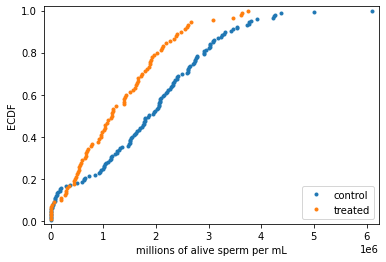

In [26]:
# Compute x,y values for ECDFs
x_control, y_control = ecdf(control)
x_treated, y_treated = ecdf(treated)

# Plot the ECDFs
plt.plot(x_control, y_control, marker='.', linestyle='none')
plt.plot(x_treated, y_treated, marker='.', linestyle='none')

# Set the margins
plt.margins(0.02)

# Add a legend
plt.legend(('control', 'treated'), loc='lower right')

# Label axes and show plot
plt.xlabel('millions of alive sperm per mL')
plt.ylabel('ECDF')
plt.show()



In [40]:
# Compute the difference in mean sperm count: diff_means
diff_means = np.mean(control) - np.mean(treated)

# Compute mean of pooled data: mean_count
mean_count = np.mean(np.concatenate((control, treated)))

# Generate shifted data sets
control_shifted = control - np.mean(control) + mean_count
treated_shifted = treated - np.mean(treated) + mean_count

# Generate bootstrap replicates
bs_reps_control = draw_bs_reps(control_shifted,
                       np.mean, size=50000)
bs_reps_treated = draw_bs_reps(treated_shifted,
                       np.mean, size=50000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_reps_control - bs_reps_treated

# Compute and print p-value: p
p = np.sum(bs_replicates >= np.mean(control) - np.mean(treated)) \
            / len(bs_replicates)
print('p-value = %.100f'% p)


p-value = 0.0000200000000000000016360610782806261909172462765127420425415039062500000000000000000000000000000000


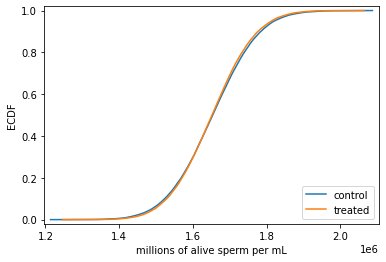

In [41]:
# Compute x,y values for ECDFs
x_control, y_control = ecdf(bs_reps_control)
x_treated, y_treated = ecdf(bs_reps_treated)

# Plot the ECDFs
plt.plot(x_control, y_control)
plt.plot(x_treated, y_treated)

# Set the margins
plt.margins(0.02)

# Add a legend
plt.legend(('control', 'treated'), loc='lower right')

# Label axes and show plot
plt.xlabel('millions of alive sperm per mL')
plt.ylabel('ECDF')
plt.show()